<h1 align='center' style='color:purple'><b>Web Scraping & SVC</b></h1>

SVM offers very high accuracy compared to other classifiers such as logistic regression, and decision trees. It is known for its kernel trick to handle nonlinear input spaces. It is used in a variety of applications such as face detection, spam classification, classification of genes etc.

The SVM classifier ([SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)) separates data points using a hyperplane with the largest amount of margin. That's why an SVM classifier is also known as a discriminative classifier. SVM finds an optimal hyperplane which helps in classifying new data points.

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, GridSearchCV

<h1><b> Web-Scraping </b></h1>

[Selenium](https://selenium-python.readthedocs.io/) is an open-source web-based automation tool. Selenium primarily used for testing in the industry but It can also be used for importing webdriver & web scraping.

In [2]:
# Import webdriver through selenium
from selenium import webdriver
# Import options, to specify some instructions for the webdriver
from selenium.webdriver.chrome.options import Options

Set 'Headless' option

In [4]:
# headless browsers are web browsers without a graphical user interface (GUI) and are usually controlled programmatically or via a command-line interface
ops = Options()
ops.add_argument("--headless")

<b>Download [ChromeDriver](https://chromedriver.chromium.org/downloads)</b>  
 - Extract driver file from zipped folder and keep it in your project folder (where your code file is).  
 - Choose the same version of ChromeDriver as that of your Chrome Browser version.

In [5]:
# Define driver and pass instructions
driver = webdriver.Chrome(executable_path="chromedriver.exe", options=ops)

# Get Data from the web page
driver.get("https://b2gdevs.github.io/MLIntro/heart-disease.html")

<b>Heart Disease Prediction</b>

We will be Scraping 13 input Features along with the target. The objective is predict the presence of heart disease in the patient.

Data Dictionary :  
 1. age
 2. sex
 3. cp : chest pain type (4 values)
 4. trestbps : resting blood pressure
 5. chol : serum cholestoral in mg/dl
 6. fbs : fasting blood sugar > 120 mg/dl
 7. restecg : resting electrocardiographic results
 8. thalach : maximum heart rate achieved
 9. exang : exercise induced angina
 10. oldpeak : ST depression induced by exercise relative to rest
 11. slope : the slope of the peak exercise ST segment
 12. ca : number of major vessels (0-3) colored by flourosopy
 13. thal : integers representing normal, fixed defect, reversable defect

<b> Extract Data from Web-page by class Name. </b>  
Class name of each variable present on the website will be used to Scrape Data. Read about other methods of locating a variable on the webpage [here](https://selenium-python.readthedocs.io/locating-elements.html).  

Steps to get class Name :  
 - Open the website (using the link specified above), Right click and select 'inspect'. 
 - A new menu will appear.
 - Now, Right-click on different attributes of patient record. Again select inspect.
 - A new line of code will be highlighted which will contain class name.

In [6]:
# '.find_elements_by_class_name' returns the object of the matching element of the specified locator.
age = driver.find_elements_by_class_name("patient-age")
sex = driver.find_elements_by_class_name("patient-sex")
cp = driver.find_elements_by_class_name("patient-cp")
trestbps = driver.find_elements_by_class_name("patient-trestbps")
chol = driver.find_elements_by_class_name("patient-chol")
fbs = driver.find_elements_by_class_name("patient-fbs")
restecg = driver.find_elements_by_class_name("patient-restecg")
thalach = driver.find_elements_by_class_name("patient-thalach")
exang = driver.find_elements_by_class_name("patient-exang")
oldpeak = driver.find_elements_by_class_name("patient-oldpeak")
slope = driver.find_elements_by_class_name("patient-slope")
ca = driver.find_elements_by_class_name("patient-ca")
thal = driver.find_elements_by_class_name("patient-thal")
target = driver.find_elements_by_class_name("patient-target")

In [10]:
age[0].text

'41'

In [11]:
# Define an array where you will store all the records iteratively
all_records = []

for i in range(len(age)-1):    # Use len(age)-1, as the values present in the last record are undefined
    record = []
    
    record.append(int(age[i].text))
    record.append(int(sex[i].text))
    record.append(int(cp[i].text))
    record.append(int(trestbps[i].text))
    record.append(int(chol[i].text))
    record.append(int(fbs[i].text))
    record.append(int(restecg[i].text))
    record.append(int(thalach[i].text))
    record.append(int(exang[i].text))
    record.append(float(oldpeak[i].text))
    record.append(int(slope[i].text))
    record.append(int(ca[i].text))
    record.append(int(thal[i].text))
    record.append(int(target[i].text))
    
    all_records.append(record)

<b> Store the Scraped data in a DataFrame </b>

In [12]:
import pandas as pd
df = pd.DataFrame(all_records, columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
                                       'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
                                       'ca', 'thal', 'target'])

In [14]:
df[df.target == 0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,67,1,0,160,286,0,6,108,1,1.5,1,3,2,0
164,67,1,0,120,229,0,6,129,1,2.6,1,2,3,0
165,62,0,0,140,268,0,6,160,0,3.6,0,2,2,0
166,63,1,0,130,254,0,6,147,0,1.4,1,1,3,0
167,53,1,0,140,203,1,6,155,1,3.1,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,57,0,0,140,241,0,6,123,1,0.2,1,0,3,0
297,45,1,3,110,264,0,6,132,0,1.2,1,0,3,0
298,68,1,0,144,193,1,6,141,0,3.4,1,2,3,0
299,57,1,0,130,131,0,6,115,1,1.2,1,1,3,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       301 non-null    int64  
 1   sex       301 non-null    int64  
 2   cp        301 non-null    int64  
 3   trestbps  301 non-null    int64  
 4   chol      301 non-null    int64  
 5   fbs       301 non-null    int64  
 6   restecg   301 non-null    int64  
 7   thalach   301 non-null    int64  
 8   exang     301 non-null    int64  
 9   oldpeak   301 non-null    float64
 10  slope     301 non-null    int64  
 11  ca        301 non-null    int64  
 12  thal      301 non-null    int64  
 13  target    301 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.0 KB


No Missing values!

In [16]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.0,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,54.395349,0.681063,0.956811,131.584718,246.295681,0.146179,6.0,149.521595,0.328904,1.027243,1.408638,0.734219,2.318937,0.541528
std,9.043221,0.466841,1.027032,17.579258,51.997137,0.353874,0.0,22.879620,0.470597,1.153887,0.607557,1.024268,0.609322,0.499102
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,6.0,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,6.0,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,6.0,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,6.0,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,6.0,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The 'restecg' feature contains only 1 value present in every record (maximum and minimum = 6). It has 0 std (standard deviation) which also means that it has 0 variance. A 0 variance Feature is not a good predictor. So we will drop this Feature.

In [17]:
df.drop('restecg', axis = 1, inplace = True)

<b> Correlation between Features </b>

In [18]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.097153,-0.069576,0.278756,0.216606,0.113124,-0.392934,0.095448,0.223852,-0.180569,0.276604,0.072620,-0.224838
sex,-0.097153,1.000000,-0.056634,-0.058435,-0.197824,0.041025,-0.048037,0.145274,0.089820,-0.020811,0.121889,0.218170,-0.286312
cp,-0.069576,-0.056634,1.000000,0.043314,-0.076098,0.081630,0.293893,-0.391214,-0.166363,0.145904,-0.175721,-0.148365,0.429449
trestbps,0.278756,-0.058435,0.043314,1.000000,0.123980,0.173220,-0.046500,0.069349,0.193121,-0.118572,0.103258,0.068110,-0.147525
chol,0.216606,-0.197824,-0.076098,0.123980,1.000000,0.015578,-0.010360,0.066712,0.054900,-0.005526,0.070201,0.097909,-0.084926
fbs,0.113124,0.041025,0.081630,0.173220,0.015578,1.000000,-0.006567,0.030589,0.000011,-0.046203,0.144331,-0.015973,-0.034485
thalach,-0.392934,-0.048037,0.293893,-0.046500,-0.010360,-0.006567,1.000000,-0.377273,-0.360748,0.408096,-0.210551,-0.094702,0.419753
exang,0.095448,0.145274,-0.391214,0.069349,0.066712,0.030589,-0.377273,1.000000,0.298966,-0.273452,0.112806,0.202564,-0.434432
oldpeak,0.223852,0.089820,-0.166363,0.193121,0.054900,0.000011,-0.360748,0.298966,1.000000,-0.568436,0.232902,0.225598,-0.445908
slope,-0.180569,-0.020811,0.145904,-0.118572,-0.005526,-0.046203,0.408096,-0.273452,-0.568436,1.000000,-0.092715,-0.128123,0.367067


As this correlation df is not easily interpretable, Lets plot a <b>Correlation Heatmap</b>

Text(0.5, 1.0, 'Correlation Heatmap')

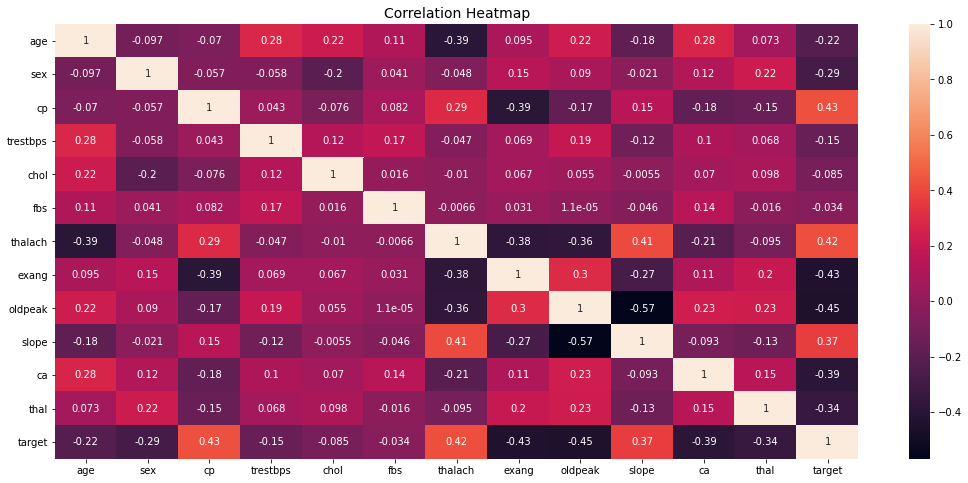

In [19]:
import seaborn as sns
plt.figure(figsize = (18,8))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Heatmap', fontsize = 14)

From above heatmap, it can be said that there is no multi collinearity in data

<b>Check For Outliers</b>

Text(0.5, 1.0, 'Boxplot of all Input Features')

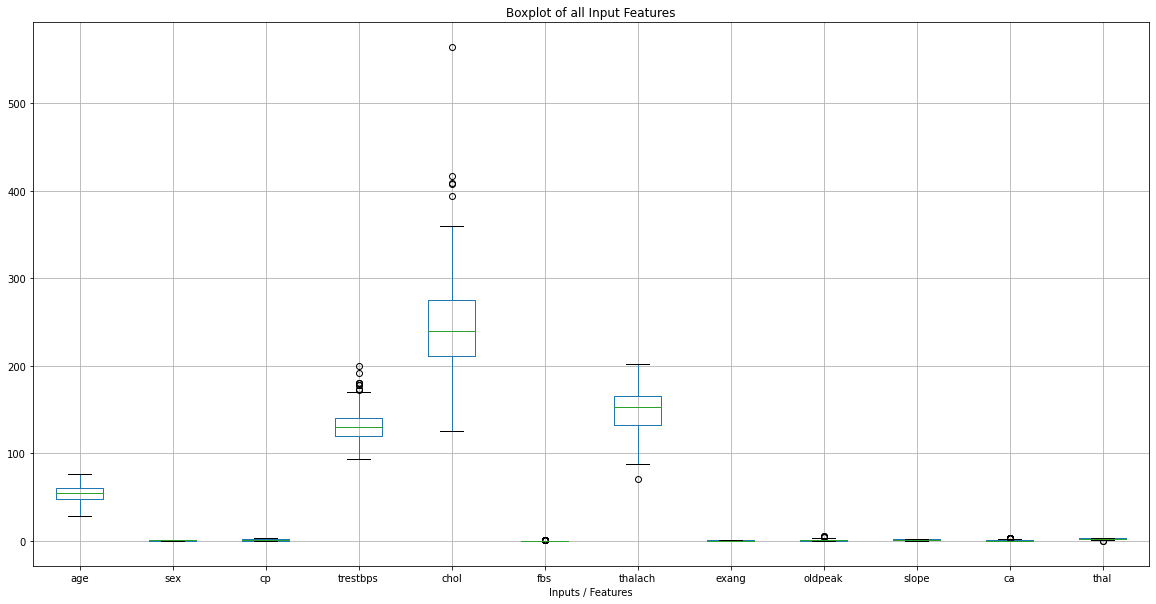

In [20]:
plt.figure(figsize = (20,10))
df.drop('target', axis = 1).boxplot()
plt.xlabel('Inputs / Features')
plt.title('Boxplot of all Input Features')

There are outliers present in 'chol' and 'trestbps' Input Features

c:\users\rahul\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\rahul\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
c:\users\rahul\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel den

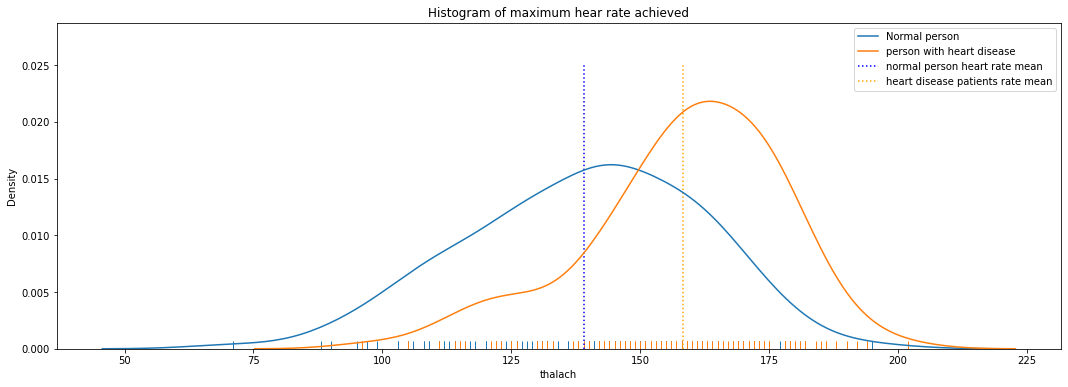

In [21]:
# thalach : maximum heart rate achieved
plt.figure(figsize = (18,6))
sns.distplot(df[df.target == 0].thalach, hist=False, rug=True, label = 'Normal person')
sns.distplot(df[df.target == 1].thalach, hist=False, rug=True, label = 'person with heart disease')
plt.title('Histogram of maximum hear rate achieved')

# plot vertical lines representing mean heart rate for heart patients and normal person
plt.vlines(df[df.target == 0].thalach.mean(), 0, 0.025, linestyles ="dotted", colors ="blue",
           label = 'normal person heart rate mean')
plt.vlines(df[df.target == 1].thalach.mean(), 0, 0.025, linestyles ="dotted", colors ="orange",
           label = 'heart disease patients rate mean')
plt.legend()
plt.show()

Person with Heart Disease tend to have higher heart rate compared to a normal person. 

<b> Lets find out age wise distribution of heart patients</b>

c:\users\rahul\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\rahul\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


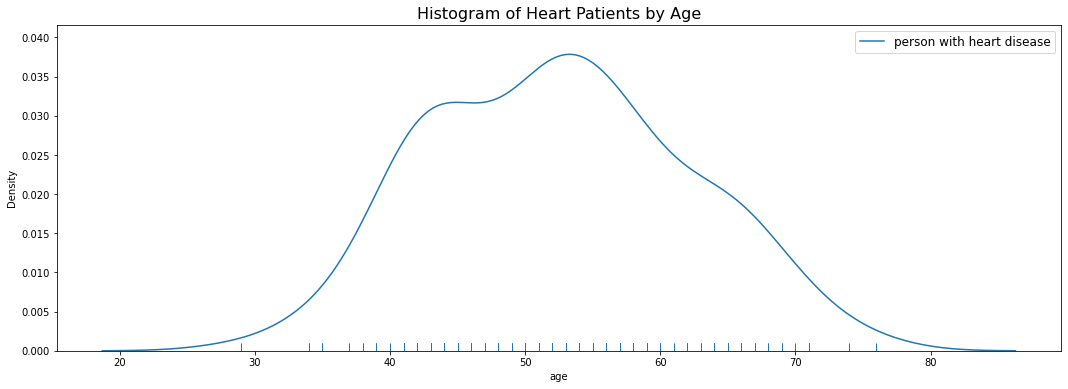

In [22]:
plt.figure(figsize = (18,6))
sns.distplot(df[df.target == 1].age, hist=False, rug=True, label = 'person with heart disease')
plt.title('Histogram of Heart Patients by Age', fontsize = 16)
plt.legend(fontsize = 12)

From this plot, it is clear that people start to develope heart related disease after 30 years of age.

Text(0.5, 1.0, 'Percent of people with heart disease')

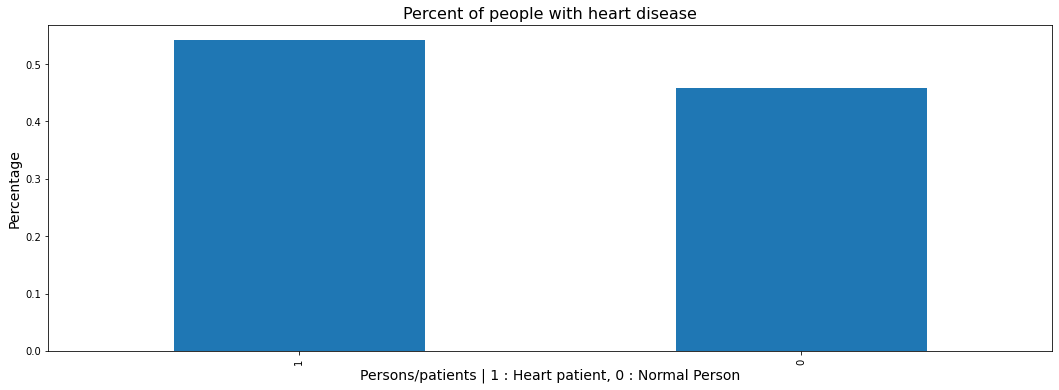

In [23]:
plt.figure(figsize = (18,6))
df.target.value_counts(normalize = True).plot(kind = 'bar')
plt.xlabel('Persons/patients | 1 : Heart patient, 0 : Normal Person', fontsize = 14)
plt.xticks(rotation = 90)
plt.ylabel('Percentage', fontsize = 14)
plt.title('Percent of people with heart disease', fontsize = 16)

More than 50 % of people in the dataset have heart related disease.

<b> Remove Outlier </b>

In [24]:
# keep df dataset as backup
df1 = df.copy()

In [25]:
# Store the length of Initial Dataset
number_of_records = df1.shape[0]

# Features which had outliers 
outlier_feature = ['trestbps', 'chol']

# For every input/ Feature, identify and remove outliers
for i in outlier_feature:

    # Find 1st and 3rd Quartile
    q1 = df1[i].quantile(0.25)
    q3 = df1[i].quantile(0.75)

    # Find Inter Quartile Range (IQR)
    iqr = q3-q1

    # Find lower and Upper Limits
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    # Remove Outliers (Data Points/Records Present outside (lower_limit, upper_limit) Range)
    df1 = df1[(df1[i] > lower_limit) & (df1[i] < upper_limit)]
    
print('{} Outliers removed.'.format(number_of_records-len(df1)))

18 Outliers removed.


<b>Separate Feature & Target</b>

In [26]:
X = df1.drop('target', axis=1)# independent Variables
y = df1['target'] #Dependent or target variables

<b>Feature Normalization</b>

In [27]:
# Initialize the imported MinMax Scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Train & Transform input Features
X = scaler.fit_transform(X)

# Lets implement models using different tyes of kernel (Linear, Polynomial & RBF)

<b>Linear</b>

In [30]:
# Initialize a SVC with Linear kernel and define the range of values for hyper-parameter C and epsilon.
# Read more about these hyper-parameter through the link provided in the First cell of this notebook.

grd = GridSearchCV(estimator=SVC(kernel='linear'),
                       param_grid={
            'C': [0.1, 1, 100, 1000],
            'degree': [2, 4],
            'coef0': [0.001, 0.0001],
            'gamma': ['scale', 'auto']
        },
                       cv=5, scoring='accuracy', verbose=0, n_jobs=-1)

In [31]:
# Fit GridSearch
grid_result = grd.fit(X, y)

# Obtain best Parameters
best_params = grid_result.best_params_
print("best parameters for Linear kernel :", best_params)

# Define the best SVM Linear model
best_svc = SVC(kernel='linear', C=best_params["C"], gamma=best_params["gamma"], coef0=0.1, shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=-1,  probability=True)

scoring = {
    'accuracy_score': 'accuracy',
    'log_loss_score': 'neg_log_loss'}

scores = cross_validate(best_svc, X, y, cv=10, scoring=scoring, return_train_score=True)

print('Accuracy of Linear Kernel = ', (scores['test_accuracy_score'].mean()))
print('Log-loss of Linear Kernel = ', -(round(scores['test_log_loss_score'].mean(),3)))    # Multiply by 0, as we are using "neg_log_loss"

best parameters for Linear kernel : {'C': 1, 'coef0': 0.001, 'degree': 2, 'gamma': 'scale'}
Accuracy of Linear Kernel =  0.8304187192118228
Log-loss of Linear Kernel =  0.398


<b>Polynomial Kernel</b>

In [32]:

grs = GridSearchCV(estimator=SVC(kernel='poly'),
                       param_grid={
            'C': [0.1, 1, 100, 1000],
            'degree': [2, 3, 4],
            'coef0': [0.1, 0.01, 0.001, 0.0001],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5, 'scale', 'auto']
        },
                       cv=5, scoring='accuracy', verbose=0, n_jobs=-1)

In [33]:
# Fit GridSearch
grid_result = grs.fit(X, y)

# Obtain best Parameters
best_params = grid_result.best_params_
print("best parameters for Polynomial kernel :", best_params)

# Define the best SVM Linear model
best_svc = SVC(kernel='poly', C=best_params["C"], gamma=best_params["gamma"], degree=best_params["degree"],
               coef0 = best_params["coef0"], shrinking=True, tol=0.001, cache_size=200, verbose=False, max_iter=-1,
               probability=True)

scoring = {
    'accuracy_score': 'accuracy',
    'log_loss_score': 'neg_log_loss'}

scores = cross_validate(best_svc, X, y, cv=10, scoring=scoring, return_train_score=True)

print('Accuracy of Linear Kernel = ', (scores['test_accuracy_score'].mean()))
print('Log-loss of Linear Kernel = ', -(round(scores['test_log_loss_score'].mean(),3)))    # Multiply by 0, as we are using "neg_log_loss"

best parameters for Polynomial kernel : {'C': 1000, 'coef0': 0.1, 'degree': 2, 'gamma': 0.005}
Accuracy of Linear Kernel =  0.8198275862068964
Log-loss of Linear Kernel =  0.399


<b>RBF Kernel</b>

In [34]:
gsc = GridSearchCV(
        estimator=SVC(kernel='rbf'),
        param_grid={
            'C': [0.1, 1, 100, 1000],
            'degree': [2, 3, 4],
            'coef0': [0.1, 0.01, 0.001, 0.0001],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5, 'scale', 'auto']
        },
        cv=5, scoring='accuracy', verbose=0, n_jobs=-1)

In [35]:
# Fit GridSearch
grid_result = gsc.fit(X, y)

# Obtain best Parameters
best_params = grid_result.best_params_
print("best parameters for rbf kernel :", best_params)

# Define the best SVM Linear model
best_svc = SVC(kernel='rbf', C=best_params["C"], gamma=best_params["gamma"], degree=best_params["degree"],
               coef0 = best_params["coef0"], shrinking=True, tol=0.001, cache_size=200, verbose=False, max_iter=-1,
               probability=True)

scoring = {
    'accuracy_score': 'accuracy',
    'log_loss_score': 'neg_log_loss'}

scores = cross_validate(best_svc, X, y, cv=10, scoring=scoring, return_train_score=True)

print('Accuracy of Linear Kernel = ', (scores['test_accuracy_score'].mean()))
print('Log-loss of Linear Kernel = ', -(round(scores['test_log_loss_score'].mean(),3)))    # Multiply by 0, as we are using "neg_log_loss"

best parameters for rbf kernel : {'C': 100, 'coef0': 0.1, 'degree': 2, 'gamma': 0.005}
Accuracy of Linear Kernel =  0.8304187192118228
Log-loss of Linear Kernel =  0.397


Based on the above results we could say that the dataset has a linear trend. As the performance of SVM Classifier with linear and rbf kernel is better than polynomial kernels. But, in case of rbf kernel the log-loss score is least. so, it can be said that for the given dataset rbf kernel works best.